## Importing the necessary library

In [1]:
import numpy as np
import pandas as pd

## Importing the train and test data

In [2]:
train_df = pd.read_csv('/Users/neeraanand/mnist_train_small.csv')

In [3]:
test_df = pd.read_csv('/Users/neeraanand/mnist_test.csv')

In [4]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train_df.shape[0])

19999


In [6]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extracting the features from the train and test data

In [7]:
x_train = train_df.drop(['6'], axis=1).values

In [8]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(x_train.shape)

(19999, 784)


In [10]:
x_test = test_df.drop(index = 1942, columns='7').values

In [11]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Extracting the labels

In [12]:
y_train = train_df['6'].values

In [13]:
print(y_train)

[5 7 9 ... 2 9 5]


In [14]:
y_test = test_df['7'].drop(1942).values

In [15]:
print(y_test)

[2 1 0 ... 5 7 8]


In [16]:
m = len(y_train)

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
print(len(np.unique(y_train)))

10


In [19]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
print(m)

19999


In [21]:
m1 = len(y_test)

In [22]:
print(m1)

1942


## Adding the bias term to the train and test features

In [23]:
x_train = np.hstack((np.ones((m, 1)), x_train))

In [24]:
print(x_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [25]:
print(x_train.shape[1])

785


In [26]:
x_test = np.hstack((np.ones((m1, 1)), x_test))

In [27]:
print(x_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## Normalisation of features of train and test set

In [28]:
x_train = x_train/255

In [29]:
x_test = x_test/255

## One hot encoding

In [30]:
y_train_new = np.zeros([x_train.shape[0], len(np.unique(y_train))])

In [31]:
print(y_train_new.shape)

(19999, 10)


In [32]:
for i in range(len(np.unique(y_train))):
    for j in range(len(y_train_new)):
        if y_train[j]==np.unique(y_train)[i]:
            y_train_new[j, i]=1
        else:
            y_train_new[j, i] =0
print(y_train_new)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
y_test_new = np.zeros([x_test.shape[0], len(np.unique(y_test))])
print(y_test_new.shape)

(1942, 10)


In [34]:
for i in range(len(np.unique(y_test))):
    
    for j in range(len(y_test_new)):
        
        if y_test[j]==np.unique(y_test)[i]:
            
            y_test_new[j, i]=1
            
        else:
            
            y_test_new[j, i] = 0
            
print(y_test_new)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [35]:
theta  = np.zeros([x_train.shape[1], y_train_new.shape[1]])
print(theta.shape)

(785, 10)


## Hypothesis function

In [36]:
# Hypothesis function
def hypothesis(theta, x):
    return 1/(1 + np.exp(-(x.dot(theta)))) 

## Cost function

In [37]:
# cost function
def computeCost(x, y, theta):
    y_new = hypothesis(theta, x)
    return -(1/len(x))*np.sum(y*np.log(y_new)+(1-y)*np.log(1-y_new))

## Gradient function

In [38]:
# gradient descent
def gradient_descent(x, y, theta, learning_rate, iterations):
    cost_hist = np.zeros(iterations)
   
    for i in range(iterations):
        
        for j in range(y.shape[1]):
        
            h = hypothesis(theta[:,j], x)
            
            for k in range(theta.shape[0]):
                
                theta[k, j] -=(learning_rate/x.shape[0])*np.sum((h-y[:,j])*x[:,k])
        cost_hist[i] = computeCost(x, y, theta)
    return theta, cost_hist

In [39]:
learning_rate = 0.99
iterations = 2500

In [40]:
theta, cost_hist = gradient_descent(x_train, y_train_new, theta, learning_rate, iterations)

In [41]:
print("The optimised value of theta is:", theta)

The optimised value of theta is: [[-0.02859955 -0.00756827 -0.03559503 ... -0.01218832 -0.13844711
  -0.06282943]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [42]:
theta.shape

(785, 10)

In [43]:
# output 
output =np.empty((y_train_new.shape[1], y_train_new.shape[0]))
for i in range(y_train_new.shape[1]):
    
    h = hypothesis(theta[:, i], x_train)
    output[i] = h

In [44]:
print(output)
print(output.shape)

[[7.85811529e-04 6.22168196e-01 1.30230185e-04 ... 4.75617454e-03
  6.42841837e-05 1.81795377e-04]
 [2.43679434e-06 1.79390092e-11 2.54883400e-09 ... 2.21175193e-08
  2.41968822e-07 6.65853732e-10]
 [3.81480293e-08 2.68930652e-06 1.91809127e-08 ... 9.30202623e-01
  1.19001607e-04 1.16494009e-04]
 ...
 [1.12611690e-04 6.99976048e-01 1.77653749e-03 ... 5.01057159e-08
  2.38906383e-02 7.78976865e-07]
 [1.41431819e-01 4.25244477e-05 5.98182273e-04 ... 3.96268892e-03
  1.37621519e-02 3.40304042e-03]
 [8.05753623e-04 3.30100320e-02 9.33928551e-01 ... 1.53132038e-06
  6.18804773e-01 2.85973317e-04]]
(10, 19999)


In [45]:
y_pred = np.argmax(output, axis=0)
print(y_pred)

[5 7 9 ... 2 9 5]


## Displaying the predicted values for train set

In [46]:
df = pd.DataFrame(columns = ['predicted_target', 'original_target'])
df['predicted_target'] = y_pred
df['original_target'] = y_train
df.head()

,predicted_target,original_target
0,5,5
1,7,7
2,9,9
3,5,5
4,2,2


In [47]:
# output for test set
output1 = np.empty((y_test_new.shape[1], y_test_new.shape[0]))
for i in range(y_test_new.shape[1]):
    
    h = hypothesis(theta[:, i], x_test)
    output1[i] = h
    

In [48]:
y_pred_test = np.argmax(output1, axis=0)
print(y_pred_test)

[2 1 0 ... 0 8 8]


## Displaying the predicted values for test set

In [49]:
df = pd.DataFrame(columns = ['predicted_target', 'original_target'])
df['predicted_target'] = y_pred_test
df['original_target'] = y_test
df.head(10)

,predicted_target,original_target
0,2,2
1,1,1
2,0,0
3,4,4
4,1,1
5,4,4
6,9,9
7,6,5
8,9,9
9,0,0


## Finding accuracy for train and test set

In [50]:
from sklearn.metrics import accuracy_score
print("Accuracy for train set: ", accuracy_score(y_pred, y_train))

Accuracy for train set:  0.9255462773138657


In [51]:
from sklearn.metrics import accuracy_score
print("Accuracy for test set: ", accuracy_score(y_pred_test, y_test))


Accuracy for test set:  0.8908341915550978


Text(0.5, 1.0, 'Convergence of gradient')

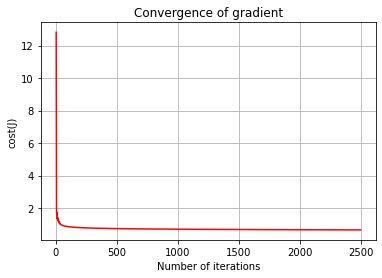

In [52]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations+1), cost_hist, color='red')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost(J)")
plt.title("Convergence of gradient")